In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('clean_data.csv')
df = data.copy()
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,4,0,279,1,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,1,1373,1,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,3,0,1392,1,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,2,0,591,1,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


---
# Data Spliting

In [3]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [4]:
x_tr, x_ts, y_train, y_tes = train_test_split(x, y, test_size=.2)

In [5]:
scalerX = StandardScaler()
x_train = scalerX.fit_transform(x_tr)
x_tes = scalerX.fit_transform(x_ts)

In [6]:
sm = RandomOverSampler()
x_train,y_train = sm.fit_resample(x_train, y_train)

In [7]:
def report(y, y_pred):
    class_report = classification_report(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    print(class_report)
    print('AUC ROC Score :', auc)

---

## 1. Logistic Regression

In [8]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
lr_pred = model_lr.predict(x_tes)
print(f1_score(y_tes, lr_pred))
report(y_tes, lr_pred)

0.5100671140939598
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       243
           1       0.39      0.75      0.51        51

    accuracy                           0.75       294
   macro avg       0.66      0.75      0.67       294
weighted avg       0.84      0.75      0.78       294

AUC ROC Score : 0.7490922294843863


---
## 2. K-Neighbor Classifier

In [9]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
knn_pred = model_knn.predict(x_tes)
print(f1_score(y_tes, knn_pred))
report(y_tes, knn_pred)

0.32592592592592595
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       243
           1       0.26      0.43      0.33        51

    accuracy                           0.69       294
   macro avg       0.56      0.59      0.56       294
weighted avg       0.76      0.69      0.72       294

AUC ROC Score : 0.5881142580488987


---
## 3. Random Forest Classifier

In [10]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
rd_pred = model_rf.predict(x_tes)
print(f1_score(y_tes, rd_pred))
report(y_tes, rd_pred)

0.29411764705882354
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       243
           1       0.59      0.20      0.29        51

    accuracy                           0.84       294
   macro avg       0.72      0.58      0.60       294
weighted avg       0.81      0.84      0.80       294

AUC ROC Score : 0.5836359235052045


---
## 4. Decision Tree Classifier

In [11]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)
dtc_pred = model_dtc.predict(x_tes)
print(f1_score(y_tes, dtc_pred))
report(y_tes, dtc_pred)

0.37500000000000006
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       243
           1       0.40      0.35      0.38        51

    accuracy                           0.80       294
   macro avg       0.63      0.62      0.63       294
weighted avg       0.79      0.80      0.79       294

AUC ROC Score : 0.6209150326797386


---
## Model Evaluation

In [12]:
models = [
{
    'label': 'Logistic Regression',
    'model': model_lr
},
{
    'label': 'K-Neighbor Classifier',
    'model': model_knn
},
{
    'label': 'Random Forest Classifier',
    'model': model_rf
},
{
    'label': 'Decision Tree Classifier',
    'model': model_dtc
}
]

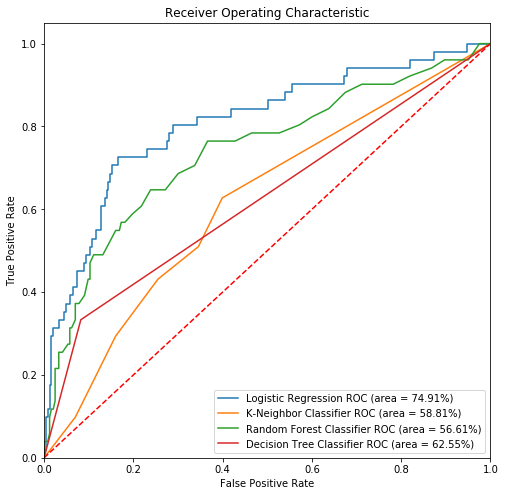

In [13]:
plt.figure(figsize=(8,8))
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_tes) # predict the test data
    
    fpr, tpr, thresholds = roc_curve(y_tes, model.predict_proba(x_tes)[:,1])
    
    auc = roc_auc_score(y_tes,model.predict(x_tes))
    
    plt.plot(fpr, tpr, label='{} ROC (area = {:.2%})'.format(m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Model yang dipilih adalah `LogisticRegression()` karena mempunyai nilai f1 score yang lebih tinggi dan juga mempunyai AOC score paling tinggi

### Fine Tunning Model for better accuracy

In [14]:
lr = LogisticRegression()

penalty = ["l1", "l2", "elasticnet", "none"]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iter = [1, 10, 100, 1000, 10000]

param_lr = {
    "penalty": penalty,
    "solver": solver,
    "max_iter" : max_iter,
    "class_weight": ["balanced"]
}

lr_tun = GridSearchCV(estimator=lr, param_grid=param_lr, cv=5)
lr_tun.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced'],
                         'max_iter': [1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs',

In [15]:
lr_tun.best_params_

{'class_weight': 'balanced',
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [16]:
best_lr = lr_tun.best_estimator_
best_lr.fit(x_train, y_train)
lr_pred_tun = best_lr.predict(x_tes)
print(f1_score(y_tes, lr_pred_tun))
report(y_tes, lr_pred_tun)

0.5170068027210885
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       243
           1       0.40      0.75      0.52        51

    accuracy                           0.76       294
   macro avg       0.67      0.75      0.68       294
weighted avg       0.84      0.76      0.78       294

AUC ROC Score : 0.7532074558218349


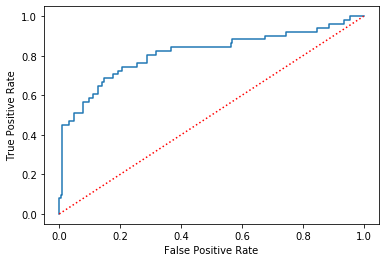

In [17]:
plt.figure()
fpr, tpr, thresold = roc_curve(y_tes, best_lr.predict_proba(x_tes)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0, 1], 'r:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

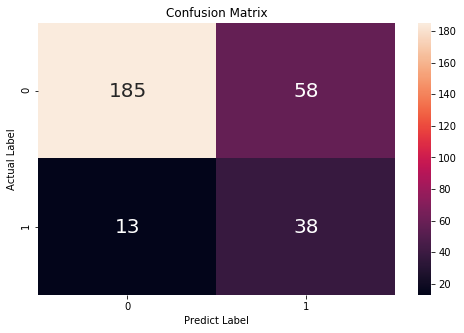

In [18]:
plt.figure(figsize = (8,5))
plt.title('Confusion Matrix')
dfcm = pd.DataFrame(confusion_matrix(y_tes, lr_pred_tun))
sns.heatmap(dfcm, annot=True, fmt='d', annot_kws={'size':20})
plt.xlabel('Predict Label')
plt.ylabel('Actual Label')
plt.show()

---
## Export Model

In [19]:
joblib.dump(best_lr, "modelML")

['modelML']